In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
bf_data = pd.read_csv('BlackFriday.csv')
bf_data.head()

,User_ID,Product_ID,Gender,Age,Age_group,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,1,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,1,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,1,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,7,16,C,4+,0,8,NaN,NaN,7969


## Black Friday Data Description

In [2]:
bf_data.shape

(537577, 13)

In [3]:
bf_data.describe()

,User_ID,Age_group,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,3.494755,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,1.352583,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,1.000000,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,3.000000,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,3.000000,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,4.000000,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,7.000000,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Age_group                   537577 non-null  int64  
 5   Occupation                  537577 non-null  int64  
 6   City_Category               537577 non-null  object 
 7   Stay_In_Current_City_Years  537577 non-null  object 
 8   Marital_Status              537577 non-null  int64  
 9   Product_Category_1          537577 non-null  int64  
 10  Product_Category_2          370591 non-null  float64
 11  Product_Category_3          164278 non-null  float64
 12  Purchase                    537577 non-null  int64  
dtypes: float64(2),

In [5]:
bf_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Age_group                          0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
bf_data.duplicated().sum()

0

## Data profile report

In [7]:
#!pip install pandas==1.2
#!pip install pandas-profiling==2.7.1

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
#from pandas_profiling import ProfileReport
#bf_data = pd.read_csv('BlackFriday.csv')
#profile = ProfileReport(bf_data, title = "Black Friday Profiling Report")
#profile

In [9]:
#profile.to_file("EDA_BlackFriday_report.html")

## User Analysis

In [10]:
UniUserid=bf_data.drop_duplicates(subset = "User_ID")
UniUserid.groupby(['Gender']).size()

Gender
F    1666
M    4225
dtype: int64

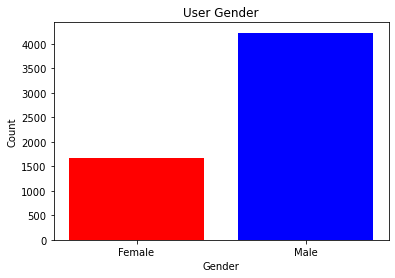

In [11]:
gender = ['Female', 'Male']
x = np.arange(len(gender))
plt.bar(x, UniUserid.groupby(['Gender']).size(),color=['red','blue'])
plt.xticks(x, gender)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('User Gender')
plt.show()

In [12]:
UniUserid=bf_data.drop_duplicates(subset = "User_ID")
UniUserid.groupby(['Occupation']).size()

Occupation
0     688
1     517
2     256
3     170
4     740
5     111
6     228
7     669
8      17
9      88
10    192
11    128
12    376
13    140
14    294
15    140
16    235
17    491
18     67
19     71
20    273
dtype: int64

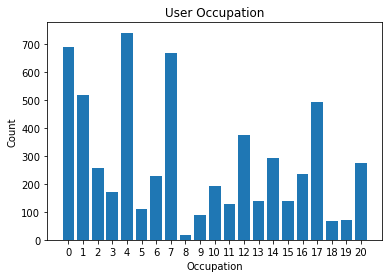

In [13]:
Occupation=[str(i) for i in range(21)]
x = np.arange(len(Occupation))
plt.bar(x, UniUserid.groupby(['Occupation']).size())
plt.xticks(x, Occupation)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('User Occupation')
plt.show()

In [14]:
UniUserid.groupby(['Age_group']).size()

Age_group
1     218
2    1069
3    2053
4    1167
5     531
6     481
7     372
dtype: int64

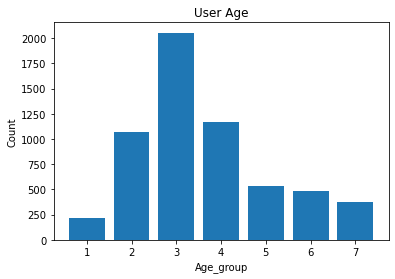

In [36]:
Age_group=['1','2','3','4','5','6','7']
x = np.arange(len(Age_group))
plt.bar(x, UniUserid.groupby(['Age_group']).size())
plt.xticks(x, Age_group)
plt.xlabel('Age_group')
plt.ylabel('Count')
plt.title('User Age')
plt.show()

In [16]:
UniUserid.groupby(['City_Category']).size()

City_Category
A    1045
B    1707
C    3139
dtype: int64

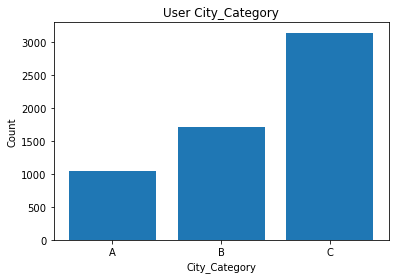

In [17]:
City_Category=['A','B','C']
x = np.arange(len(City_Category))
plt.bar(x, UniUserid.groupby(['City_Category']).size())
plt.xticks(x, City_Category)
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.title('User City_Category')
plt.show()

In [18]:
UniUserid.groupby(['Marital_Status']).size()

Marital_Status
0    3417
1    2474
dtype: int64

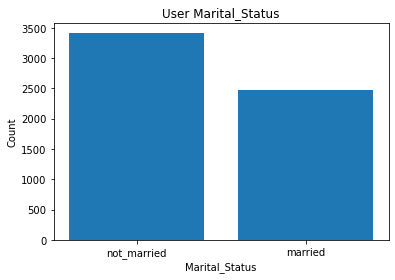

In [19]:
Marital_Status=['not_married','married']
x = np.arange(len(Marital_Status))
plt.bar(x, UniUserid.groupby(['Marital_Status']).size())
plt.xticks(x, Marital_Status)
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('User Marital_Status')
plt.show()

In [20]:
UniUserid.groupby(['Stay_In_Current_City_Years']).size()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
dtype: int64

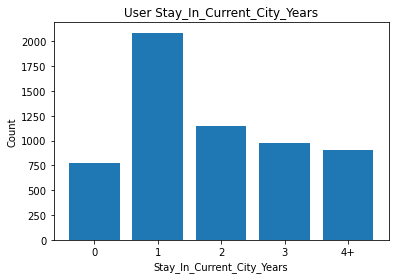

In [21]:
Stay_In_Current_City_Years=['0','1','2','3','4+']
x = np.arange(len(Stay_In_Current_City_Years))
plt.bar(x, UniUserid.groupby(['Stay_In_Current_City_Years']).size())
plt.xticks(x, Stay_In_Current_City_Years)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.title('User Stay_In_Current_City_Years')
plt.show()

## Most Purchase Product

In [22]:
a=bf_data.groupby(['Product_ID']).size()
a.sort_values(ascending=False).head()

Product_ID
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
dtype: int64

In [23]:
top_seller=bf_data[bf_data['Product_ID']=='P00265242']
top_seller

,User_ID,Product_ID,Gender,Age,Age_group,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
399,1000066,P00265242,M,26-35,3,18,C,2,0,5,8.0,NaN,8652
1191,1000196,P00265242,F,36-45,4,9,C,4+,0,5,8.0,NaN,8767
1372,1000222,P00265242,M,26-35,3,1,A,1,0,5,8.0,NaN,6944
1845,1000301,P00265242,M,18-25,2,4,B,4+,0,5,8.0,NaN,8628
2209,1000345,P00265242,M,26-35,3,12,A,2,1,5,8.0,NaN,8593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537292,1004693,P00265242,M,18-25,2,1,A,1,0,5,8.0,NaN,8841
537321,1004702,P00265242,M,26-35,3,11,C,0,0,5,8.0,NaN,6891
537405,1004720,P00265242,M,26-35,3,2,C,4+,0,5,8.0,NaN,8628
537416,1004725,P00265242,M,36-45,4,5,A,2,0,5,8.0,NaN,6916


### 平均單次消費金額最多的用戶  Highest User's Average Purchase amount

In [24]:
total=bf_data[['User_ID','Purchase','Gender']]
total_purchase=total.groupby(['User_ID']).mean('Purchase')
total_purchase.sort_values(by='Purchase',ascending=False).head()

,Purchase
User_ID,
1005069,19278.375000
1003902,18777.247312
1005999,18345.944444
1001349,18162.739130
1000101,17511.369231


### 平均總消費金額最高的用戶 Highest User's Total Purchase

In [25]:
total=bf_data[['User_ID','Purchase','Gender']]
total_purchase=total.groupby(['User_ID']).sum('Purchase')
total_purchase.sort_values(by='Purchase',ascending=False).head()

,Purchase
User_ID,
1004277,10536783
1001680,8699232
1002909,7577505
1001941,6817493
1000424,6573609


### 消費次數最高的用戶 Most frenquently Purchase User

In [26]:
b=bf_data.groupby(['User_ID']).size()
b.sort_values(ascending=False).head()

User_ID
1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
dtype: int64

## Overall Transaction Analysis

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

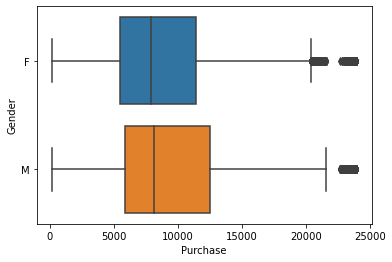

In [27]:
import seaborn as sns
sns.boxplot(x='Purchase',y='Gender',data=bf_data)

C:\Users\vivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

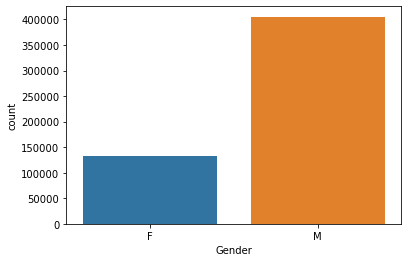

In [28]:
sns.countplot(bf_data['Gender'])

C:\Users\vivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

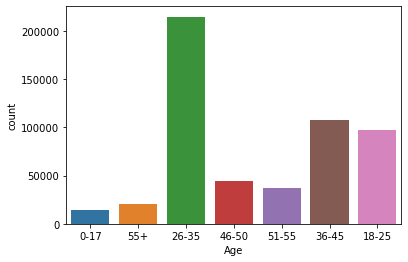

In [29]:
sns.countplot(bf_data['Age'])

C:\Users\vivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

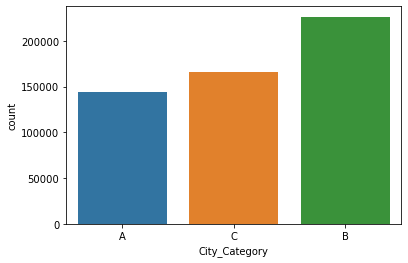

In [30]:
sns.countplot(bf_data['City_Category'])

C:\Users\vivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

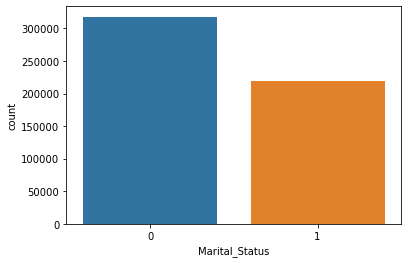

In [31]:
sns.countplot(bf_data['Marital_Status'])

C:\Users\vivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


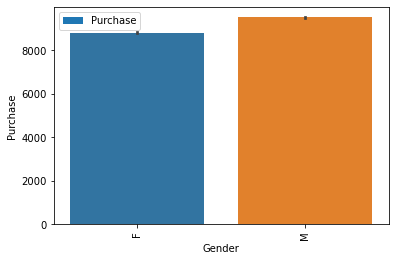

In [32]:
bf_data[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = bf_data)
plt.show()

C:\Users\vivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


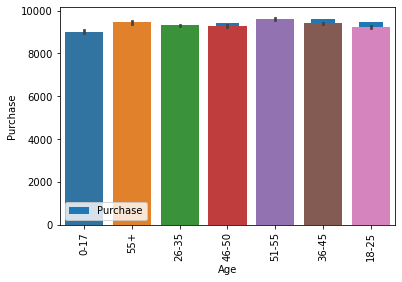

In [33]:
bf_data[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = bf_data)
plt.show()

C:\Users\vivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


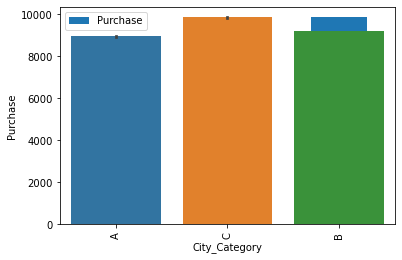

In [34]:
bf_data[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = bf_data)
plt.show()